In [4]:
import sqlite3
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Data cleaning
Fill missing data and remove unused columns

In [ ]:
df = pd.read_csv("diabetes_project_dataset.csv") 

In [ ]:
df.head(8)

In [ ]:
df.shape

In [ ]:
# drop existing diabetes
df=df[df['existing_diabetes']!=1.0]
df = df.drop(['existing_diabetes'], axis = 1)
df.head()

In [ ]:
#drop columns with all NaNs
#df.dropna(axis=1,how='all')

In [ ]:
#for individual features, check for missing values
idv_df=df[df.columns.drop(list(df.filter(regex='^mtb*',axis=1)))]
idv_df.shape

In [139]:
#for individual features, drop sampless with NaN. 
clean_idv_df=idv_df.dropna(subset=idv_df.columns,how='any')

In [140]:
clean_idv_df.shape

(1741, 22)

In [141]:
# for the rest of NaNs in blood marker, fill na with zero. Check
#clean_df=clean_df.fillna(0)
#clean_df.isna().sum()

# Survival analysis for individual features

In [11]:
clean_idv_df=idv_df.dropna(axis=0,how='any',inplace=False)
clean_idv_df.shape

(1741, 22)

In [12]:
from lifelines import CoxPHFitter

In [13]:
#checking parameters for individual features
#data=clean_df[clean_df.columns.drop(list(clean_df.filter(regex='^mtb*',axis=1)))]
data=clean_idv_df

In [14]:
cph=CoxPHFitter()
cph.fit(data,'diabetes_time',event_col='incident_diabetes')
cph.print_summary()

C:\Users\Zi Ye\anaconda3\lib\site-packages\lifelines\fitters\coxph_fitter.py:1593: ConvergenceWarning: Newton-Rhaphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  "Newton-Rhaphson failed to converge sufficiently. {0}".format(CONVERGENCE_DOCS), exceptions.ConvergenceWarning


<lifelines.CoxPHFitter: fitted with 1741 total observations, 1521 right-censored observations>
             duration col = 'diabetes_time'
                event col = 'incident_diabetes'
      baseline estimation = breslow
   number of observations = 1741
number of events observed = 220
   partial log-likelihood = -2822.02
         time fit was run = 2021-04-17 22:22:23 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
SampleID             0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
age                  0.05       1.05       0.01             0.03             0.08                 1.03                 1.08
male                 2.42      11.27       0.34             1.76             3.08                 5.84                21.77
BMI                  0.29       1.34       0.03             0.24             0.34                 1.27                 1.41
HDL                 -0.45       0.64       0.31            -1.05             0.16                 0.35                 1.17
LDL                  0.63       1.88       0.09             0.45             0.82                 1.57                 2.26
trig                -0.31       0.73       0.12            -0.53            -0.08                 0.59                 0.92
SBP                  0.02       1.02       0.00             0.02             0.03                 1.02                 1.03
DBP                 -0.11       0.89       0.01            -0.13            -0.09                 0.88                 0.91
hypertension        -0.09       0.91       0.18            -0.44             0.26                 0.64                 1.30
fasting             -0.21       0.81       0.04            -0.28            -0.13                 0.75                 0.88
fasting_glucose      0.57       1.76       0.15             0.28             0.85                 1.32                 2.34
fasting_insulin     -0.04       0.96       0.02            -0.08             0.01                 0.92                 1.01
HbA1c               -0.60       0.55       0.03            -0.67            -0.53                 0.51                 0.59
current_smoker      -0.34       0.71       0.35            -1.03             0.35                 0.36                 1.41
ex_smoker            0.82       2.28       0.18             0.46             1.18                 1.58                 3.27
exercise             0.87       2.39       0.14             0.60             1.13                 1.83                 3.11
healthy_vegetables  -0.04       0.96       0.04            -0.12             0.04                 0.89                 1.04
junk_food           -0.29       0.75       0.06            -0.40            -0.18                 0.67                 0.84
total_fiber         -0.14       0.87       0.02            -0.19            -0.10                 0.83                 0.91

                        z      p   -log2(p)
covariate                                  
SampleID             9.01 <0.005      62.09
age                  3.90 <0.005      13.36
male                 7.22 <0.005      40.77
BMI                 10.98 <0.005      90.82
HDL                 -1.45   0.15       2.78
LDL                  6.75 <0.005      36.03
trig                -2.68   0.01       7.08
SBP                  6.32 <0.005      31.86
DBP                -10.43 <0.005      82.21
hypertension        -0.50   0.62       0.70
fasting             -5.44 <0.005      24.16
fasting_glucose      3.88 <0.005      13.21
fasting_insulin     -1.65   0.10       3.35
HbA1c              -17.29 <0.005     220.11
current_smoker      -0.98   0.33       1.61
ex_smoker            4.45 <0.005      16.82
exercise             6.44 <0.005      32.95
healthy_vegetables  -1.05   0.29       1.77
junk_food

In [15]:
#harmful factors
idx=(cph.hazard_ratios_>1.1)

cfactors=data.columns.drop(['diabetes_time','incident_diabetes'])
cfactors
cfactors[idx]

Index(['male', 'BMI', 'LDL', 'fasting_glucose', 'ex_smoker', 'exercise'], dtype='object')

In [19]:
cfactors

Index(['SampleID', 'age', 'male', 'BMI', 'HDL', 'LDL', 'trig', 'SBP', 'DBP',
       'hypertension', 'fasting', 'fasting_glucose', 'fasting_insulin',
       'HbA1c', 'current_smoker', 'ex_smoker', 'exercise',
       'healthy_vegetables', 'junk_food', 'total_fiber'],
      dtype='object')

In [18]:
#protective factors
idx=(cph.hazard_ratios_<0.9)

cfactors=data.columns.drop(['diabetes_time','incident_diabetes'])
cfactors
cph.hazard_ratios_


covariate
SampleID               1.000387
age                    1.053640
male                  11.274422
BMI                    1.336243
HDL                    0.639653
LDL                    1.881002
trig                   0.734661
SBP                    1.023217
DBP                    0.894472
hypertension           0.914249
fasting                0.813241
fasting_glucose        1.760815
fasting_insulin        0.964344
HbA1c                  0.548738
current_smoker         0.708839
ex_smoker              2.275846
exercise               2.385271
healthy_vegetables     0.959387
junk_food              0.750306
total_fiber            0.868065
Name: exp(coef), dtype: float64

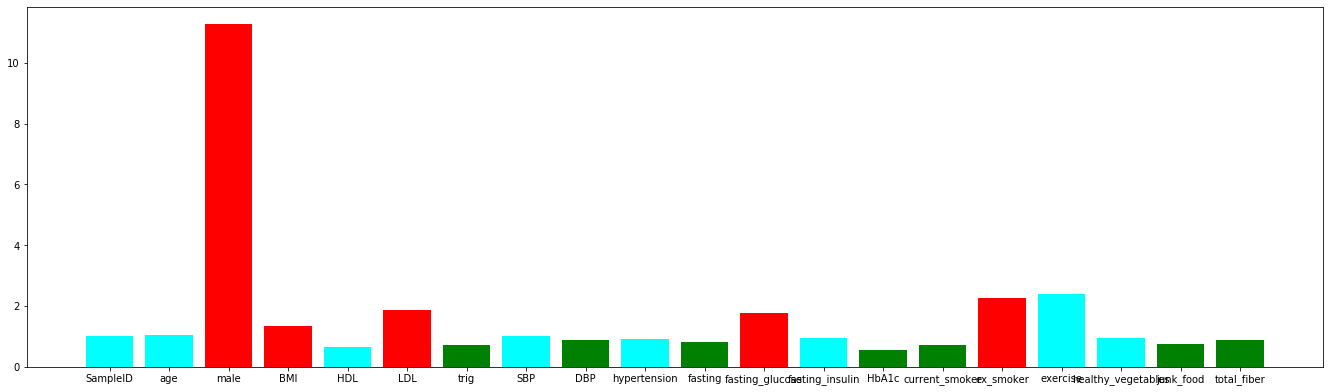

In [24]:
fig=plt.figure(figsize=(18,5))
ax=fig.add_axes([0,0,1,1])
width=0.8
x=cfactors
y=cph.hazard_ratios_
ax.bar(x,y)
plt.bar(x, y, color=['cyan','cyan','red','red','cyan','red', 'green','cyan','green','cyan','green','red', 'cyan', 'green', 'green','red','cyan', 'cyan', 'green', 'green'])
plt.show()

In [17]:
cfactors

Index(['SampleID', 'age', 'male', 'BMI', 'HDL', 'LDL', 'trig', 'SBP', 'DBP',
       'hypertension', 'fasting', 'fasting_glucose', 'fasting_insulin',
       'HbA1c', 'current_smoker', 'ex_smoker', 'exercise',
       'healthy_vegetables', 'junk_food', 'total_fiber'],
      dtype='object')

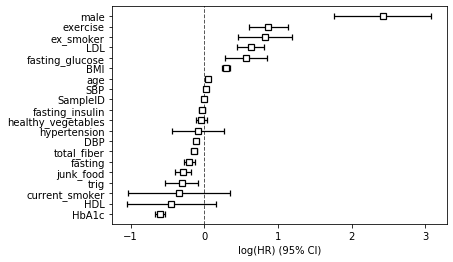

In [16]:
#Graphical representation of factor significance. HR =1: no effect. HR <1: reduction in the hazard   HR>1: Increase in hazard
#log(HR)=0: no effect; >1:increase in hazard; <1:decrease in hazard 
cph.plot()

In [58]:
# The effect of excercise on diabetes is a bit counter-intuitive, thus I took a closer look at this data
from lifelines import KaplanMeierFitter

In [59]:
exc_1=KaplanMeierFitter()
exc_2=KaplanMeierFitter()
exc_3=KaplanMeierFitter()
exc_4=KaplanMeierFitter()
exc_1_df=clean_idv_df.query('exercise == 1.0')
exc_2_df=clean_idv_df.query('exercise == 2.0')
exc_3_df=clean_idv_df.query('exercise == 3.0')
exc_4_df=clean_idv_df.query('exercise == 4.0')

In [60]:
exc_1.fit(durations = exc_1_df['diabetes_time'],event_observed=exc_1_df['incident_diabetes'],label='No much exercise')
exc_2.fit(durations = exc_2_df['diabetes_time'],event_observed=exc_2_df['incident_diabetes'],label='No much exercise but move')
exc_3.fit(durations = exc_3_df['diabetes_time'],event_observed=exc_3_df['incident_diabetes'],label='3 hr exercise')
exc_4.fit(durations = exc_4_df['diabetes_time'],event_observed=exc_4_df['incident_diabetes'],label='intense exercise')

<lifelines.KaplanMeierFitter:"intense exercise", fitted with 11 total observations, 9 right-censored observations>

In [149]:
exc_4.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.00,0,0,0,11,11
8.24,1,1,0,0,11
8.98,1,1,0,0,10
14.72,1,0,1,0,9
14.74,1,0,1,0,8
14.76,1,0,1,0,7
14.80,2,0,2,0,6
14.82,2,0,2,0,4
14.84,2,0,2,0,2


In [154]:
print(exc_1.survival_function_)
print(exc_2.survival_function_)
print(exc_3.survival_function_)
print(exc_4.survival_function_)

          No much exercise
timeline                  
0.00              1.000000
0.48              0.996721
0.74              0.996721
0.92              0.993432
0.96              0.993432
...                    ...
14.90             0.863669
14.91             0.863669
14.92             0.863669
14.93             0.863669
14.94             0.863669

[113 rows x 1 columns]
          No much exercise but move
timeline                           
0.00                       1.000000
0.25                       0.999087
0.70                       0.998174
0.78                       0.997260
0.80                       0.996347
...                             ...
14.90                      0.855499
14.91                      0.855499
14.92                      0.855499
14.93                      0.855499
14.94                      0.855499

[286 rows x 1 columns]
          3 hr exercise
timeline               
0.00           1.000000
1.18           0.996970
1.89           0.993939
2.16         

Text(0.5, 1.0, 'KMF')

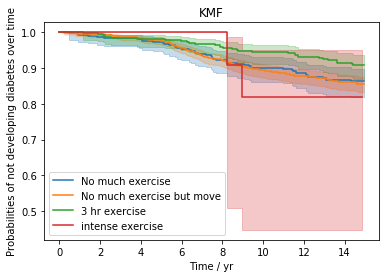

In [61]:
# predict probabilities of not developing diabetes
exc_1.plot()
exc_2.plot()
exc_3.plot()
exc_4.plot()

plt.xlabel('Time / yr')
plt.ylabel('Probabilities of not developing diabetes over time')
plt.title('KMF')

Text(0.5, 1.0, 'KMF')

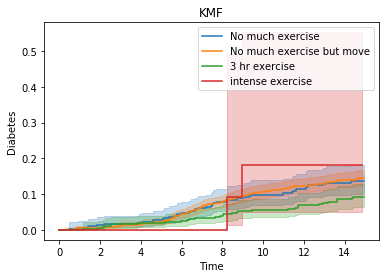

In [148]:
# predict diabete probabilities of a person at certain timeline
exc_1.plot_cumulative_density()
exc_2.plot_cumulative_density()
exc_3.plot_cumulative_density()
exc_4.plot_cumulative_density()

plt.xlabel('Time')
plt.ylabel('Diabete probabilities of a person through years')
plt.title('KMF')

## Conclusion

Based on the HR value and p value for each factor, we conclude that

1. There is strong evidience (p<0.05) indicating that gender, to be more specific, being male significantly increased the risk of diabetes by a factor of 10.27. This is the most harmful factor identified in this study.
2. Intense exercise, being ex-smoker, high LDL, long hours fasting glucose and high BMI alse increased the risk of diabetes.


(NOTE: A further investigation of exercise found that although intense exercise for competitive sports increase the risk of diabete, exercise at least 3 hours a week gives the lowest development of diabetes.)

3. High DBP, total fiber intake, fasting hours, junk food intake,and hbA1C are pretective factors that reduced the risk of diabetes. 


4. Base on statistical significance, we don't have enough evident (p>0.05) to claim that HDL, hypertension, fasting_insulin, ex_smoker, and healthy_vegetables have an effect on development of diabetes
5. Based on HR (hazard ratio), these factors of following factors: age, SBP, and fasting_insulin, have relatively small effect (<10%) on delevepment of diabetes.

# Survival analysis for blood biomarkers

In [111]:
# select blood marker, fill na with 0
mtb_col=[col for col in df if col.startswith('mtb_')]
data=df[mtb_col]
data.columns=mtb_col
data.fillna(0,inplace=True)

C:\Users\Zi Ye\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [119]:
#log transformation to increase robustness
log_data=data
for i in mtb_col:
    log_data[i]=np.log(data[i])

C:\Users\Zi Ye\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
log_data.head()

,mtb_1368087,mtb_1380093,mtb_1812369,mtb_1838668,mtb_1042362,mtb_1091716,mtb_1228672,mtb_1542487,mtb_1272352,mtb_1391826,...,mtb_2129028,mtb_2129035,mtb_2129040,mtb_2129060,mtb_2129124,mtb_2129133,mtb_2129210,mtb_2129554,mtb_2129677,mtb_2129684
1,2.527643,2.517414,2.187803,1.768069,2.764435,2.992116,2.423177,2.566915,2.980979,2.570236,...,2.941218,2.410198,1.624284,1.793306,2.794440,1.457883,1.321218,-inf,-inf,-inf
2,2.291697,2.381717,2.189999,1.964195,2.622015,2.644666,2.238478,2.208128,2.878260,2.453458,...,2.630626,2.048904,-inf,0.871605,-inf,1.295249,1.814858,-inf,-inf,-inf
3,2.579675,2.582614,2.250547,2.033121,3.036660,2.766449,2.152652,2.509997,2.949533,2.698949,...,2.848940,2.362682,-inf,1.672501,2.576320,1.071804,1.380419,-inf,-inf,-inf
4,2.406510,2.541444,2.341942,2.140547,2.793806,2.807464,2.553734,2.380531,2.978185,2.596549,...,2.718533,1.995506,-inf,1.475892,2.551433,1.156416,1.637825,-inf,-inf,-inf
5,2.523424,2.626578,2.234965,1.822436,2.704773,2.972440,2.413119,2.540680,3.043775,2.674955,...,2.619852,1.752728,-inf,0.991530,-inf,1.395579,1.730001,-inf,-inf,-inf


In [118]:
data.columns

Index(['mtb_1368087', 'mtb_1380093', 'mtb_1812369', 'mtb_1838668',
       'mtb_1042362', 'mtb_1091716', 'mtb_1228672', 'mtb_1542487',
       'mtb_1272352', 'mtb_1391826',
       ...
       'mtb_2129028', 'mtb_2129035', 'mtb_2129040', 'mtb_2129060',
       'mtb_2129124', 'mtb_2129133', 'mtb_2129210', 'mtb_2129554',
       'mtb_2129677', 'mtb_2129684'],
      dtype='object', length=60184)

In [122]:
log_data['diabetes_time']=df['diabetes_time']
log_data['incident_diabetes']=df['incident_diabetes']
log_data.dropna(subset=['diabetes_time','incident_diabetes'],how='any')
log_data.shape

C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(7840, 60186)

In [ ]:
cph=CoxPHFitter()
cph.fit(log_data,'diabetes_time',event_col='incident_diabetes')
cph.plot()